# Investigating information about countries from the World Bank

Variables:

    Year - Year
    CountryName - Name of the Country
    CountryCode - Code of the Country
    Agriculturalrawmaterialsexpor - Agricultural raw materials exports (% of merchandise exports)
    ArmsexportsSIPRItrendindica - Arms exports (SIPRI trend indicator values)
    Commercialserviceexportscurr - Commercial service exports (current US)
    Communicationscomputeretc - Communications, computer, etc. (% of service exports, BoP)
    Exportsofgoodsandservices - Exports of goods and services (% of GDP)
    Exportsofgoodsandservicesa - Exports of goods and services (annual % growth) 
    ExportsofgoodsandservicesB - Exports of goods and services (BoP, current US)
    Exportsofgoodsandservicesc - Exports of goods and services (constant 2010 US)
    Foodexportsofmerchandisee - Food exports (% of merchandise exports)
    GoodsexportsBoPcurrentUS - Goods exports (BoP, current US)
    Fuelexportsofmerchandisee - Fuel exports (% of merchandise exports)
    Hightechnologyexportsofma - High-technology exports (% of manufactured exports)
    Hightechnologyexportscurrent - High-technology exports (current US)
    TaxesonexportscurrentLCU - Taxes on exports (current LCU) 
    Transportservicesofservice - Transport services (% of service exports, BoP)
    Travelservicesofcommercial - Travel services (% of commercial service exports)
    Travelservicesofserviceex - Travel services (% of service exports, BoP)
    high_income - High income countries
    income - Income
    development - Developed or developing country

In [151]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

In [152]:
df = pd.read_excel('Worldbank.xlsx', index_col=2)
df = df.drop('Year', 1)
df

<ipython-input-152-68ea56c4893e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Year', 1)


,CountryName,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,...,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex,high_income,income,development
CountryCode,,,,,,,,,,,,,,,,,,,,,
AND,Andorra,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581574,...,0.013955,28.460560,3.391348e+07,NaN,NaN,NaN,NaN,1,high income,developed
ATG,Antigua and Barbuda,0.000000,NaN,1.112068e+09,0.187833,NaN,NaN,1.151693e+09,NaN,42.748239,...,0.000000,0.209768,3.911000e+03,NaN,12.063282,79.197620,79.085789,1,high income,developing
ABW,Aruba,0.075850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.631183,...,0.122011,8.338925,2.562959e+06,NaN,NaN,NaN,NaN,1,high income,developing
AUS,Australia,2.293782,38000000.0,6.856142e+10,4.851458,21.804658,4.101769,3.272645e+11,3.350844e+11,12.546827,...,24.448891,16.708318,5.274080e+09,NaN,8.130395,65.777866,64.968547,1,high income,developed
AUT,Austria,1.613744,5000000.0,7.413284e+10,8.824110,55.755855,5.884652,2.538067e+11,2.640225e+11,7.456444,...,2.047786,11.638526,1.668750e+10,NaN,23.070122,31.340080,31.080313,1,high income,developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,-10.787575,NaN,8.327258e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,middle income,developing
VNM,Vietnam,NaN,NaN,1.479050e+10,NaN,105.831805,14.265533,2.584875e+11,2.397090e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,middle income,developing
PSE,West Bank and Gaza,NaN,NaN,5.608593e+08,36.257881,19.865352,7.878720,2.903485e+09,2.456322e+09,NaN,...,NaN,NaN,NaN,NaN,1.625164,43.720375,40.034937,0,middle income,developing


In [153]:
df['CountryName'] = df['CountryName'].astype('string')
df['high_income'] = df['high_income'].astype('bool')
df['income'] = df['income'].astype('category')
df['development'] = df['development'].astype('category')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, AND to ZWE
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CountryName                    217 non-null    string  
 1   Agriculturalrawmaterialsexpor  126 non-null    float64 
 2   ArmsexportsSIPRItrendindica    40 non-null     float64 
 3   Commercialserviceexportscurr   164 non-null    float64 
 4   Communicationscomputeretc      159 non-null    float64 
 5   Exportsofgoodsandservices      168 non-null    float64 
 6   Exportsofgoodsandservicesa     151 non-null    float64 
 7   ExportsofgoodsandservicesB     163 non-null    float64 
 8   Exportsofgoodsandservicesc     148 non-null    float64 
 9   Foodexportsofmerchandisee      127 non-null    float64 
 10  GoodsexportsBoPcurrentUS       164 non-null    float64 
 11  Fuelexportsofmerchandisee      122 non-null    float64 
 12  Hightechnologyexportsofma      109 non-

In [155]:
df.describe()

,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,GoodsexportsBoPcurrentUS,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex
count,126.000000,4.000000e+01,1.640000e+02,159.000000,168.000000,151.000000,1.630000e+02,1.480000e+02,127.000000,1.640000e+02,122.000000,109.000000,1.090000e+02,2.200000e+01,159.000000,161.000000,161.000000
mean,3.482839,6.895500e+08,3.409975e+10,12.581114,44.799398,4.825023,1.461328e+11,1.508739e+11,24.900377,1.107192e+11,16.113229,11.458729,1.635265e+10,2.197709e+11,19.429609,43.996890,42.226638
std,8.907713,1.913451e+09,8.716023e+10,13.008886,31.485667,8.133853,3.623060e+11,3.210746e+11,24.186395,2.876574e+11,24.356154,12.032572,3.932458e+10,7.067350e+11,14.912237,26.004362,25.074767
min,0.000000,0.000000e+00,1.000630e+07,-7.096171,7.761403,-37.757437,3.110111e+07,6.105987e+07,0.005818,5.800000e+06,0.000000,0.003258,3.320000e+02,9.200000e+04,0.044392,0.711187,0.674764
25%,0.443663,1.075000e+07,7.909955e+08,4.071505,25.366386,2.062379,2.673611e+09,5.044135e+09,7.535677,1.355111e+09,1.252478,3.536273,2.580541e+07,2.796903e+07,7.516094,21.931045,21.489868
50%,1.139189,6.600000e+07,4.371386e+09,7.972149,37.705143,4.195722,1.822627e+10,1.990745e+10,15.253620,1.106958e+10,4.642974,7.790672,3.803684e+08,4.853386e+08,16.122008,43.262158,40.731757
75%,2.749113,4.295000e+08,1.995910e+10,16.609590,54.616692,7.760299,1.009528e+11,1.281052e+11,38.320455,7.341662e+10,20.330562,16.708318,9.569070e+09,4.748734e+09,28.012172,62.973950,59.626205
max,73.691101,1.050800e+10,8.057390e+11,78.122941,211.559049,36.478051,2.651010e+12,2.364439e+12,98.185379,2.417443e+12,95.827420,61.110220,2.096102e+11,2.999517e+12,74.873487,97.307685,92.670309


In [156]:
df['development']=df['development'].str.strip()

# Task 1

## Hypotheses:

For each variable in {Agriculturalrawmaterialsexpor,
    ArmsexportsSIPRItrendindica,
    Commercialserviceexportscurr,
    Communicationscomputeretc,
    Exportsofgoodsandservices,
    Exportsofgoodsandservicesa,
    ExportsofgoodsandservicesB,
    Exportsofgoodsandservicesc,
    Foodexportsofmerchandisee,
    GoodsexportsBoPcurrentUS,
    Fuelexportsofmerchandisee,
    Hightechnologyexportsofma,
    Hightechnologyexportscurrent,
    TaxesonexportscurrentLCU,
    Transportservicesofservice,
    Travelservicesofcommercial,
    Travelservicesofserviceex}:

H1: The distribution of the variable is different from the normal distribution

H0: The distribution of the variable is not different from the normal distribution

p-value = 0.05

### ArmsexportsSIPRItrendindica
There are only few records of this var, so Shapiro has to be used

In [157]:
stats.shapiro(df.ArmsexportsSIPRItrendindica.dropna())

ShapiroResult(statistic=0.38618260622024536, pvalue=9.669370339138172e-12)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

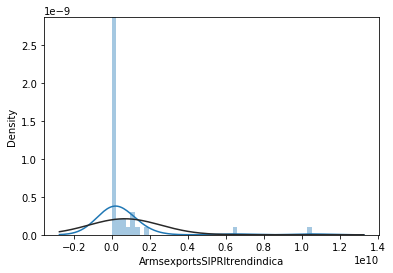

In [158]:
sns.distplot(df.ArmsexportsSIPRItrendindica.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### TaxesonexportscurrentLCU
There are only few records of this var, so Shapiro has to be used

In [159]:
stats.shapiro(df.TaxesonexportscurrentLCU.dropna())

ShapiroResult(statistic=0.35919511318206787, pvalue=7.956933778530129e-09)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

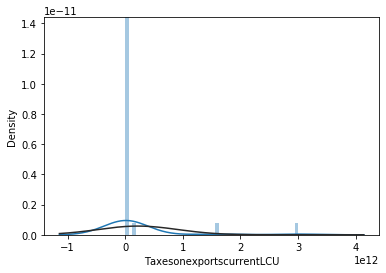

In [160]:
sns.distplot(df.TaxesonexportscurrentLCU.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### For all other vars Kolmogorov has to be used (enough quantity of vars for this)

### Agriculturalrawmaterialsexpor

In [161]:
stats.kstest(df.Agriculturalrawmaterialsexpor.dropna(), 'norm', args=(df.Agriculturalrawmaterialsexpor.dropna().mean(), df.Agriculturalrawmaterialsexpor.dropna().std()))

KstestResult(statistic=0.347901815635626, pvalue=3.924587324163506e-14)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

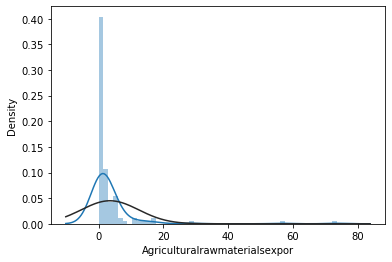

In [162]:
sns.distplot(df.Agriculturalrawmaterialsexpor.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Commercialserviceexportscurr

In [163]:
stats.kstest(df.Commercialserviceexportscurr.dropna(), 'norm', args=(df.Commercialserviceexportscurr.dropna().mean(), df.Commercialserviceexportscurr.dropna().std()))

KstestResult(statistic=0.34785581150990785, pvalue=3.0805246924684517e-18)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

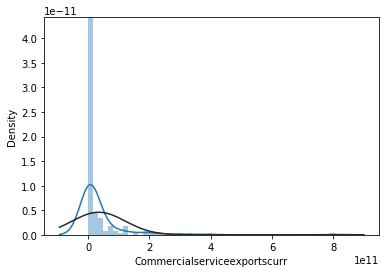

In [164]:
sns.distplot(df.Commercialserviceexportscurr.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Communicationscomputeretc

In [165]:
stats.kstest(df.Communicationscomputeretc.dropna(), 'norm', args=(df.Communicationscomputeretc.dropna().mean(), df.Communicationscomputeretc.dropna().std()))

KstestResult(statistic=0.1562162181400641, pvalue=0.0007438419048175456)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

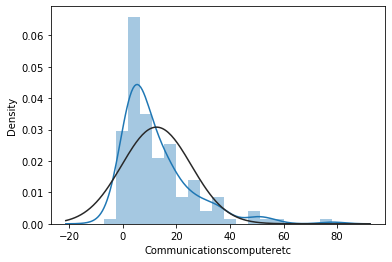

In [166]:
sns.distplot(df.Communicationscomputeretc.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Exportsofgoodsandservices

In [167]:
stats.kstest(df.Exportsofgoodsandservices.dropna(), 'norm', args=(df.Exportsofgoodsandservices.dropna().mean(), df.Exportsofgoodsandservices.dropna().std()))

KstestResult(statistic=0.15285627907323168, pvalue=0.0006817498553572166)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

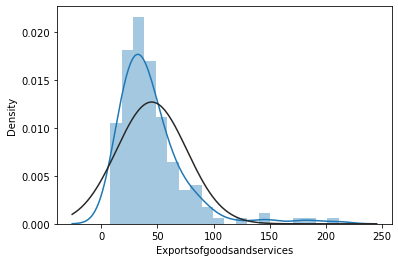

In [168]:
sns.distplot(df.Exportsofgoodsandservices.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Exportsofgoodsandservicesa

In [169]:
stats.kstest(df.Exportsofgoodsandservicesa.dropna(), 'norm', args=(df.Exportsofgoodsandservicesa.dropna().mean(), df.Exportsofgoodsandservicesa.dropna().std()))

KstestResult(statistic=0.14407431134364282, pvalue=0.003372499642179317)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

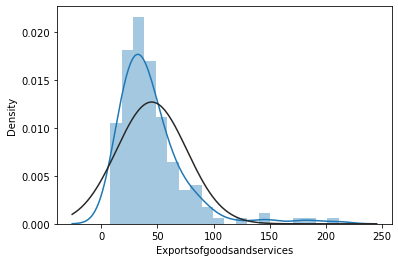

In [170]:
sns.distplot(df.Exportsofgoodsandservices.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### ExportsofgoodsandservicesB

In [171]:
stats.kstest(df.ExportsofgoodsandservicesB.dropna(), 'norm', args=(df.ExportsofgoodsandservicesB.dropna().mean(), df.ExportsofgoodsandservicesB.dropna().std()))

KstestResult(statistic=0.3433803216440361, pvalue=1.1514894951816901e-17)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

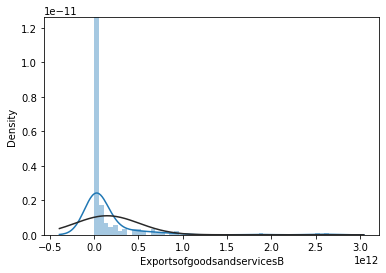

In [172]:
sns.distplot(df.ExportsofgoodsandservicesB.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Exportsofgoodsandservicesc

In [173]:
stats.kstest(df.Exportsofgoodsandservicesc.dropna(), 'norm', args=(df.Exportsofgoodsandservicesc.dropna().mean(), df.Exportsofgoodsandservicesc.dropna().std()))

KstestResult(statistic=0.3192800808776206, pvalue=6.424771504699146e-14)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

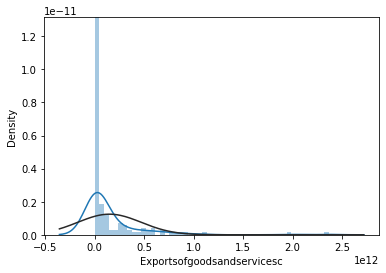

In [174]:
sns.distplot(df.Exportsofgoodsandservicesc.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Foodexportsofmerchandisee

In [175]:
stats.kstest(df.Foodexportsofmerchandisee.dropna(), 'norm', args=(df.Foodexportsofmerchandisee.dropna().mean(), df.Foodexportsofmerchandisee.dropna().std()))

KstestResult(statistic=0.18878026625365685, pvalue=0.00019490955827101332)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

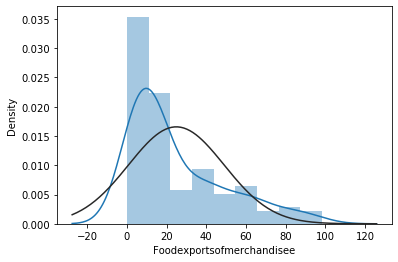

In [176]:
sns.distplot(df.Foodexportsofmerchandisee.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### GoodsexportsBoPcurrentUS

In [177]:
stats.kstest(df.GoodsexportsBoPcurrentUS.dropna(), 'norm', args=(df.GoodsexportsBoPcurrentUS.dropna().mean(), df.GoodsexportsBoPcurrentUS.dropna().std()))

KstestResult(statistic=0.35016340109411437, pvalue=1.757931817913572e-18)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

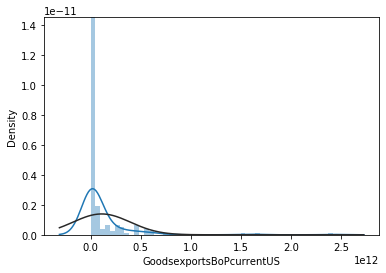

In [178]:
sns.distplot(df.GoodsexportsBoPcurrentUS.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Fuelexportsofmerchandisee

In [179]:
stats.kstest(df.Fuelexportsofmerchandisee.dropna(), 'norm', args=(df.Fuelexportsofmerchandisee.dropna().mean(), df.Fuelexportsofmerchandisee.dropna().std()))

KstestResult(statistic=0.2541243675211682, pvalue=1.967425472082898e-07)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

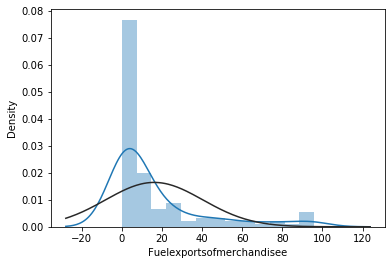

In [180]:
sns.distplot(df.Fuelexportsofmerchandisee.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Hightechnologyexportsofma

In [181]:
stats.kstest(df.Hightechnologyexportsofma.dropna(), 'norm', args=(df.Hightechnologyexportsofma.dropna().mean(), df.Hightechnologyexportsofma.dropna().std()))

KstestResult(statistic=0.1705463612603269, pvalue=0.003055769090921867)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

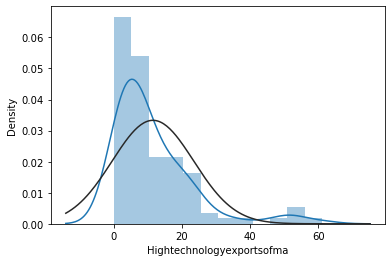

In [182]:
sns.distplot(df.Hightechnologyexportsofma.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Hightechnologyexportscurrent

In [183]:
stats.kstest(df.Hightechnologyexportscurrent.dropna(), 'norm', args=(df.Hightechnologyexportscurrent.dropna().mean(), df.Hightechnologyexportscurrent.dropna().std()))

KstestResult(statistic=0.3387642810514707, pvalue=1.1547889972290874e-11)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

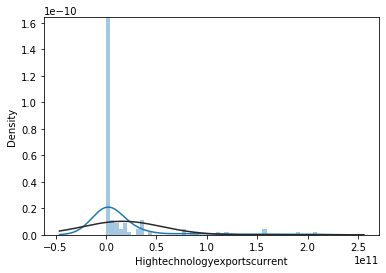

In [184]:
sns.distplot(df.Hightechnologyexportscurrent.dropna(), fit=norm)

#### Conclusion:
p-value < 0.05 => H1 is accepted at 5%

### Transportservicesofservice

In [185]:
stats.kstest(df.Transportservicesofservice.dropna(), 'norm', args=(df.Transportservicesofservice.dropna().mean(), df.Transportservicesofservice.dropna().std()))

KstestResult(statistic=0.10491513638229732, pvalue=0.05607997953022392)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

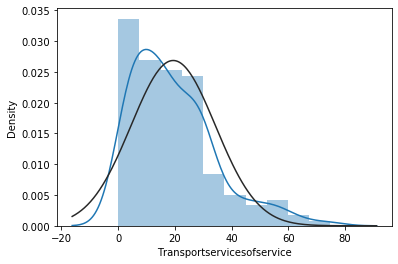

In [186]:
sns.distplot(df.Transportservicesofservice.dropna(), fit=norm)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

### Travelservicesofcommercial

In [187]:
stats.kstest(df.Travelservicesofcommercial.dropna(), 'norm', args=(df.Travelservicesofcommercial.dropna().mean(), df.Travelservicesofcommercial.dropna().std()))

KstestResult(statistic=0.09553969641122712, pvalue=0.09907565566329246)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

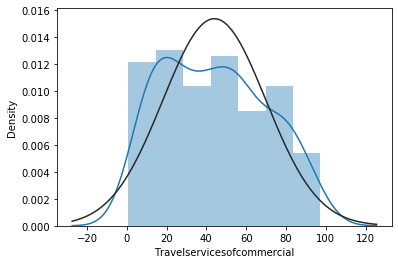

In [188]:
sns.distplot(df.Travelservicesofcommercial.dropna(), fit=norm)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

### Travelservicesofserviceex

In [189]:
stats.kstest(df.Travelservicesofserviceex.dropna(), 'norm', args=(df.Travelservicesofserviceex.dropna().mean(), df.Travelservicesofserviceex.dropna().std()))

KstestResult(statistic=0.08336118017262839, pvalue=0.2015993092471281)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

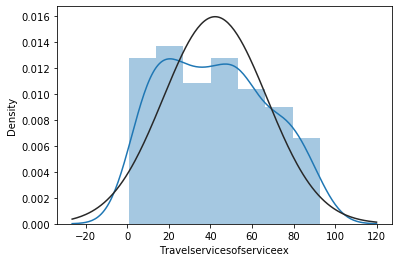

In [190]:
sns.distplot(df.Travelservicesofserviceex.dropna(), fit=norm)

#### Conclusion:
p-value > 0.05 => H1 is rejected at 5% => the distribution is not significantly different from normal

### Final Conclusion:

H1 is rejected for Travelservicesofserviceex, Travelservicesofcommercial, Transportservicesofservice, for all other ratio and interval variables H1 is accepted

## Task 2

### Hypotheses:

H1: there is a relationship between High income countries and their income (seems obvious, but still)

H0: there is no relationship between High income countries and their income

p-value = 0.05

Chi-squared test can be used for these purposes as the aim is to check either there is a relation or not, and it is possible due to the fact that both variables are categorial and number of values in both columns is the same (maximum possible)

#### Contingency Matrix:

In [191]:
df.groupby('high_income')['income'].value_counts(normalize=True).unstack()

,high income,low income,middle income
high_income,,,
False,0.0,0.214815,0.785185
True,1.0,0.000000,0.000000


As is seen, 'high income' countries have only 'high income' values in column 'income', while non-'high income' countries have only values of low and middle income. It is obvious that there is a relation between these 2 columns

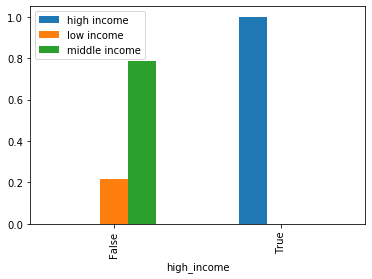

In [192]:
df.groupby('high_income')['income'].value_counts(normalize=True).unstack().plot(kind='bar')

In [193]:
ct_income_high_income = pd.crosstab(df['high_income'], df['income'])
chi2_results = stats.chi2_contingency(ct_income_high_income)
print('chi2 = ', chi2_results[0], '   p-value =', chi2_results[1])

chi2 =  217.0    p-value = 7.569177914366364e-48


#### Conclusion:

H1 is accepted at 5% level of significance as p-value < 0.05 and at 1% level also, as p-value < 0.01

### Hypotheses:

H1: there is a relationship between High income countries and Developed or developing countries

H0: there is no relationship between High income countries and Developed or developing countries

p-value = 0.05

In [194]:
df.groupby('high_income')['development'].value_counts(normalize=True).unstack()

development,developed,developing
high_income,,
False,0.007407,0.992593
True,0.560976,0.439024


As is seen, almost all countries with not high income are only developing. As for countries with high income, most of them are developed. Seems that there is a relation between these variables

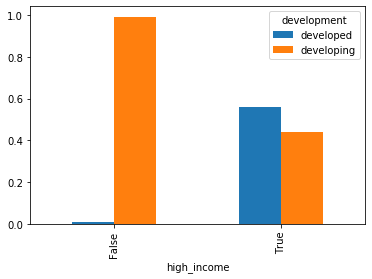

In [195]:
df.groupby('high_income')['development'].value_counts(normalize=True).unstack().plot(kind='bar')

In [196]:
ct_development_high_income = pd.crosstab(df['high_income'], df['development'])
chi2_results = stats.chi2_contingency(ct_development_high_income)
print('chi2 = ', chi2_results[0], '   p-value =', chi2_results[1])

chi2 =  88.89680884133621    p-value = 4.159538519406816e-21


#### Conclusion:

H1 is accepted at 5% level of significance as p-value < 0.05 and at 1% level also, as p-value < 0.01

## Task 3

### Examining correlation of variables (Travelservicesofserviceex, Travelservicesofcommercial)
Note. Both of vars are normally distributed, so Pearson can be used

H1: There is a relationship between Travel services (% of commercial service exports) and Travel services (% of service exports, BoP) (r != 0)

H0: There is no relationship between Travel services (% of commercial service exports) and Travel services (% of service exports, BoP) (r = 0)

In [197]:
df['Travelservicesofserviceex'].corr(df['Travelservicesofcommercial'])

0.9918844373094661

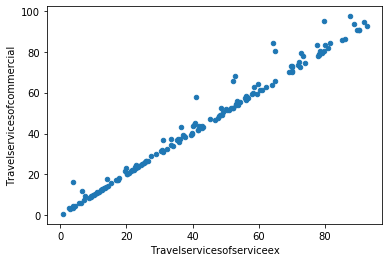

In [198]:
df.plot('Travelservicesofserviceex', 'Travelservicesofcommercial', kind='scatter')

In [199]:
 print("Pearson's r:", stats.pearsonr(df.Travelservicesofserviceex.dropna(), df.Travelservicesofcommercial.dropna())[0], 
       '    p-value:', stats.pearsonr(df.Travelservicesofserviceex.dropna(), df.Travelservicesofcommercial.dropna())[1])

Pearson's r: 0.9918844373094658     p-value: 2.4343549662287632e-144


#### Conclusion

Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.

Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.

Strength of the relationship: the correlation coefficient is 0.99, therefore, there is a very strong (almost linear) correlation between the variables

### Examining correlation of variables (Hightechnologyexportsofma, Exportsofgoodsandservices)
Note. Both of vars are not normally distributed, they are scale vars, so Spearman can be used

H1: There is a relationship between Exports of goods and services (% of GDP) and High-technology exports (% of manufactured exports) (r != 0)

H0: There is no relationship between Exports of goods and services (% of GDP) and High-technology exports (% of manufactured exports) (r = 0)

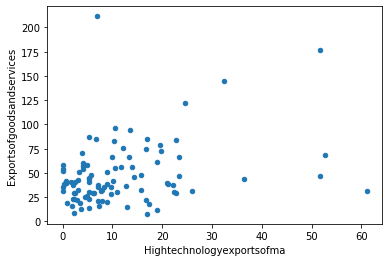

In [200]:
df.plot('Hightechnologyexportsofma', 'Exportsofgoodsandservices', kind='scatter')

In [201]:
df_without_empties = df.dropna(subset=['Hightechnologyexportsofma','Exportsofgoodsandservices'])

In [202]:
stats.spearmanr(df_without_empties.Hightechnologyexportsofma, df_without_empties.Exportsofgoodsandservices)

SpearmanrResult(correlation=0.24737805150176284, pvalue=0.014057360125424623)

#### Conclusion

Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.

Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.

Strength of the relationship: the correlation coefficient is 0.25, therefore, there is a weak correlation between the variables

### Examining correlation of variables (Agriculturalrawmaterialsexpor, Foodexportsofmerchandisee)
Note. Both of vars are not normally distributed, they are scale vars, so Spearman can be used

H1: There is a relationship between Agricultural raw materials exports (% of merchandise exports) and Food exports (% of merchandise exports) (r != 0)

H0: There is no relationship between Agricultural raw materials exports (% of merchandise exports) and Food exports (% of merchandise exports) (r = 0)

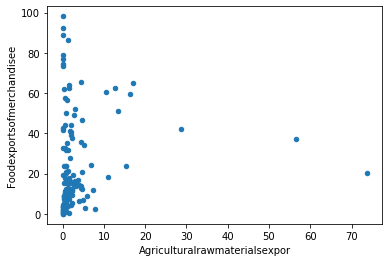

In [203]:
df.plot('Agriculturalrawmaterialsexpor', 'Foodexportsofmerchandisee', kind='scatter')

In [204]:
df_without_empties = df.dropna(subset=['Agriculturalrawmaterialsexpor','Foodexportsofmerchandisee'])

In [205]:
stats.spearmanr(df_without_empties.Agriculturalrawmaterialsexpor, df_without_empties.Foodexportsofmerchandisee)

SpearmanrResult(correlation=0.22408098987626549, pvalue=0.011655816245933778)

#### Conclusion

Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.

Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.

Strength of the relationship: the correlation coefficient is 0.22, therefore, there is a weak correlation between the variables

## Task 4

Let us examine vars (Travelservicesofcommercial, Commercialserviceexportscurr). Both are scale vars without normal distribution, so spearman correlation can be used.
It is explored how the correlation between these vars is affected by any other variable from the dataset

In [206]:
df_without_empties = df.dropna(subset=['Travelservicesofcommercial','Commercialserviceexportscurr'])

In [207]:
stats.spearmanr(df_without_empties.Commercialserviceexportscurr, df_without_empties.Travelservicesofcommercial)

SpearmanrResult(correlation=-0.3633569128134346, pvalue=2.1636821180620933e-06)

It is seen that there is a weak negative correlation with quite low pvalue

#### Agriculturalrawmaterialsexpor

In [208]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Agriculturalrawmaterialsexpor', method = 'spearman')

,n,r,CI95%,p-val
spearman,114,-0.469533,"[-0.6, -0.31]",1.552257e-07


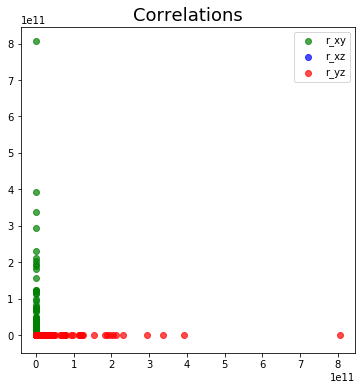

In [209]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Agriculturalrawmaterialsexpor, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Agriculturalrawmaterialsexpor, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation becomes greater than source corr with a decrease in p-value. Variable 'Agriculturalrawmaterialsexpor' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### ArmsexportsSIPRItrendindica

In [210]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='ArmsexportsSIPRItrendindica', method = 'spearman')

,n,r,CI95%,p-val
spearman,38,-0.117705,"[-0.43, 0.21]",0.487798


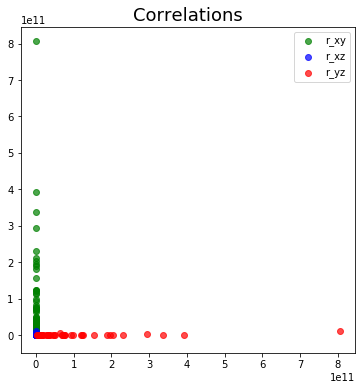

In [211]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.ArmsexportsSIPRItrendindica, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.ArmsexportsSIPRItrendindica, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that ArmsexportsSIPRItrendindica can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [212]:
stats.spearmanr(df_without_empties.dropna(subset=['ArmsexportsSIPRItrendindica']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['ArmsexportsSIPRItrendindica']).ArmsexportsSIPRItrendindica)

SpearmanrResult(correlation=0.6212784923396484, pvalue=3.147936719032237e-05)

Indeed, there is a medium correlation between Commercialserviceexportscurr and ArmsexportsSIPRItrendindica

#### Communicationscomputeretc

In [213]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Communicationscomputeretc', method = 'spearman')

,n,r,CI95%,p-val
spearman,158,-0.4239,"[-0.54, -0.29]",3.164041e-08


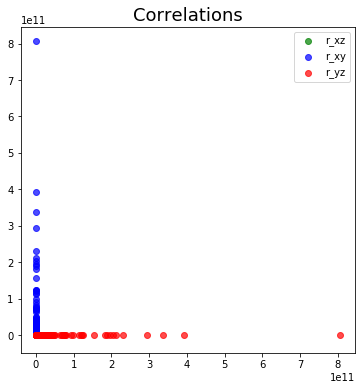

In [214]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Communicationscomputeretc, c='g', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='b', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Communicationscomputeretc, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation becomes greater than source corr with a decrease in p-value. Variable 'Communicationscomputeretc' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### Exportsofgoodsandservices

In [215]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Exportsofgoodsandservices', method = 'spearman')

,n,r,CI95%,p-val
spearman,137,-0.38149,"[-0.52, -0.23]",0.000005


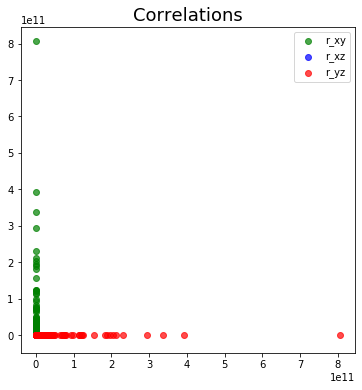

In [216]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Exportsofgoodsandservices, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Exportsofgoodsandservices, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

Almost nothing is changed, 'Exportsofgoodsandservices' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### Exportsofgoodsandservicesa

In [217]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Exportsofgoodsandservicesa', method = 'spearman')

,n,r,CI95%,p-val
spearman,124,-0.345944,"[-0.49, -0.18]",0.000089


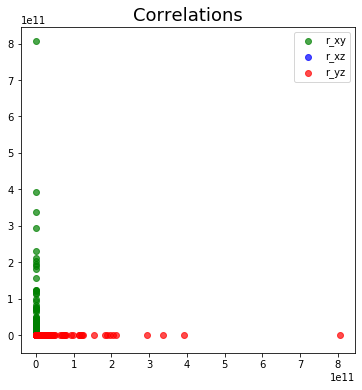

In [218]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Exportsofgoodsandservicesa, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Exportsofgoodsandservicesa, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

Almost nothing is changed, 'Exportsofgoodsandservicesa' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### ExportsofgoodsandservicesB

In [219]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='ExportsofgoodsandservicesB', method = 'spearman')

,n,r,CI95%,p-val
spearman,161,0.088963,"[-0.07, 0.24]",0.26327


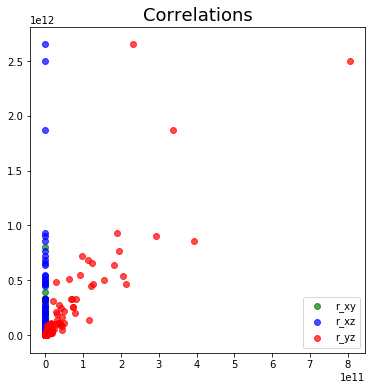

In [220]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.ExportsofgoodsandservicesB, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.ExportsofgoodsandservicesB, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that ExportsofgoodsandservicesB can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [221]:
stats.spearmanr(df_without_empties.dropna(subset=['ExportsofgoodsandservicesB']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['ExportsofgoodsandservicesB']).ExportsofgoodsandservicesB)

SpearmanrResult(correlation=0.936338279273062, pvalue=3.565216775952927e-74)

Indeed, there is a very strong correlation between Commercialserviceexportscurr and ExportsofgoodsandservicesB.

#### Exportsofgoodsandservicesc

In [222]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Exportsofgoodsandservicesc', method = 'spearman')

,n,r,CI95%,p-val
spearman,122,0.035686,"[-0.14, 0.21]",0.697574


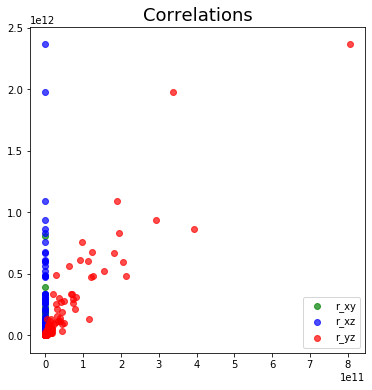

In [223]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Exportsofgoodsandservicesc, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Exportsofgoodsandservicesc, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that Exportsofgoodsandservicesc can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [224]:
stats.spearmanr(df_without_empties.dropna(subset=['Exportsofgoodsandservicesc']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['Exportsofgoodsandservicesc']).Exportsofgoodsandservicesc)

SpearmanrResult(correlation=0.9308904537358611, pvalue=2.568858728899239e-54)

Indeed, there is a very strong correlation between Commercialserviceexportscurr and Exportsofgoodsandservicesc.

#### Foodexportsofmerchandisee

In [225]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Foodexportsofmerchandisee', method = 'spearman')

,n,r,CI95%,p-val
spearman,115,-0.390408,"[-0.54, -0.22]",0.000018


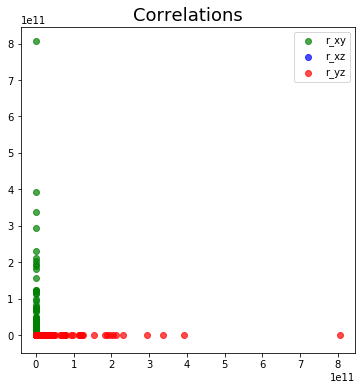

In [226]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Foodexportsofmerchandisee, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Foodexportsofmerchandisee, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

Almost nothing is changed, 'Exportsofgoodsandservicesa' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### GoodsexportsBoPcurrentUS

In [227]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='GoodsexportsBoPcurrentUS', method = 'spearman')

,n,r,CI95%,p-val
spearman,161,0.046814,"[-0.11, 0.2]",0.556644


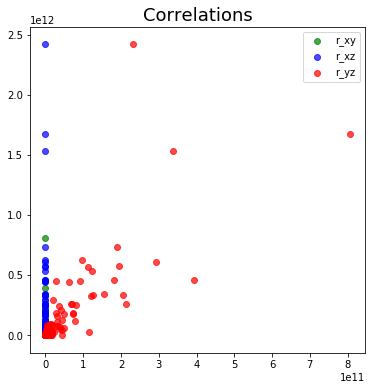

In [228]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.GoodsexportsBoPcurrentUS, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.GoodsexportsBoPcurrentUS, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that GoodsexportsBoPcurrentUS can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [229]:
stats.spearmanr(df_without_empties.dropna(subset=['GoodsexportsBoPcurrentUS']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['GoodsexportsBoPcurrentUS']).GoodsexportsBoPcurrentUS)

SpearmanrResult(correlation=0.8654934437543135, pvalue=1.3353703732720957e-49)

Indeed, there is a very strong correlation between Commercialserviceexportscurr and GoodsexportsBoPcurrentUS.

#### Fuelexportsofmerchandisee

In [230]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Fuelexportsofmerchandisee', method = 'spearman')

,n,r,CI95%,p-val
spearman,111,-0.47435,"[-0.61, -0.32]",1.650072e-07


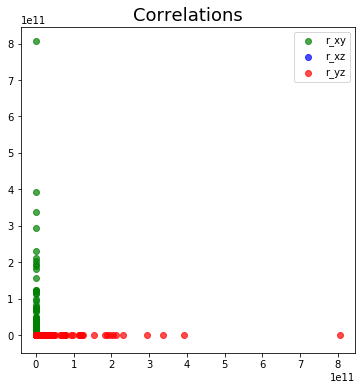

In [231]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Fuelexportsofmerchandisee, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Fuelexportsofmerchandisee, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation becomes greater than source corr with a decrease in p-value. Variable 'Fuelexportsofmerchandisee' does not explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

#### Hightechnologyexportsofma

In [232]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Hightechnologyexportsofma', method = 'spearman')

,n,r,CI95%,p-val
spearman,101,-0.298711,"[-0.47, -0.11]",0.002538


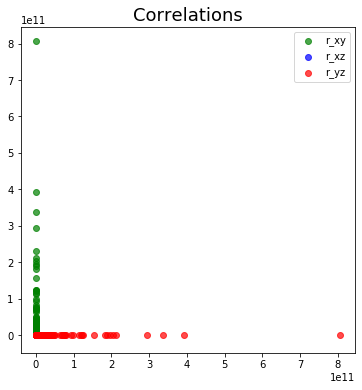

In [233]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Hightechnologyexportsofma, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Hightechnologyexportsofma, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

Hightechnologyexportsofma has a small impact on Travelservicesofcommercial and Commercialserviceexportscurr, but the difference is small and according to p-value, the correlation is still significant

#### Hightechnologyexportscurrent

In [234]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Hightechnologyexportscurrent', method = 'spearman')

,n,r,CI95%,p-val
spearman,101,-0.060637,"[-0.25, 0.14]",0.548975


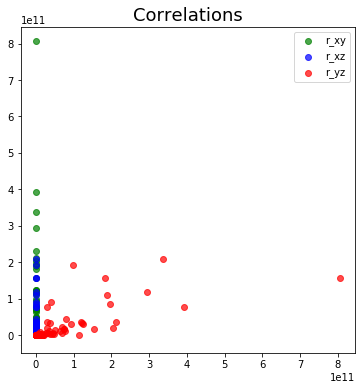

In [235]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Hightechnologyexportscurrent, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Hightechnologyexportscurrent, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that Hightechnologyexportscurrent can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [236]:
stats.spearmanr(df_without_empties.dropna(subset=['Hightechnologyexportscurrent']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['Hightechnologyexportscurrent']).Hightechnologyexportscurrent)

SpearmanrResult(correlation=0.9055329062317996, pvalue=1.2088834273295214e-38)

Indeed, there is a very strong correlation between Commercialserviceexportscurr and GoodsexportsBoPcurrentUS.

#### TaxesonexportscurrentLCU

In [237]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='TaxesonexportscurrentLCU', method = 'spearman')

,n,r,CI95%,p-val
spearman,19,-0.255812,"[-0.65, 0.24]",0.305562


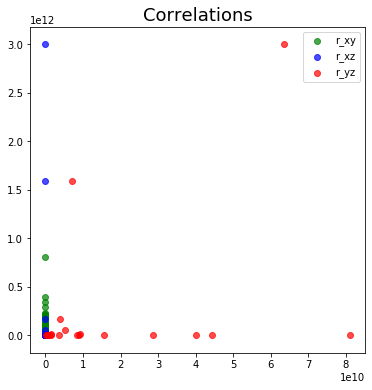

In [238]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.TaxesonexportscurrentLCU, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.TaxesonexportscurrentLCU, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that TaxesonexportscurrentLCU can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [239]:
stats.spearmanr(df_without_empties.dropna(subset=['TaxesonexportscurrentLCU']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['TaxesonexportscurrentLCU']).TaxesonexportscurrentLCU)

SpearmanrResult(correlation=0.2912280701754386, pvalue=0.22639719358125593)

In [240]:
stats.spearmanr(df_without_empties.dropna(subset=['TaxesonexportscurrentLCU']).Travelservicesofcommercial, df_without_empties.dropna(subset=['TaxesonexportscurrentLCU']).TaxesonexportscurrentLCU)

SpearmanrResult(correlation=-0.46842105263157896, pvalue=0.04309342451548047)

Indeed, there is a negative medium correlation between Travelservicesofcommercial and TaxesonexportscurrentLCU.

#### Transportservicesofservice

In [241]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Transportservicesofservice', method = 'spearman')

,n,r,CI95%,p-val
spearman,159,-0.307387,"[-0.44, -0.16]",0.000085


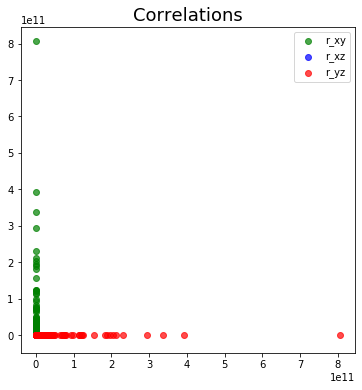

In [242]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Transportservicesofservice, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Transportservicesofservice, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

Transportservicesofservice has a small impact on Travelservicesofcommercial and Commercialserviceexportscurr, but the difference is small and according to p-value, the correlation is still significant

#### Travelservicesofserviceex

In [243]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='Travelservicesofserviceex', method = 'spearman')

,n,r,CI95%,p-val
spearman,161,-0.416101,"[-0.54, -0.28]",4.443344e-08


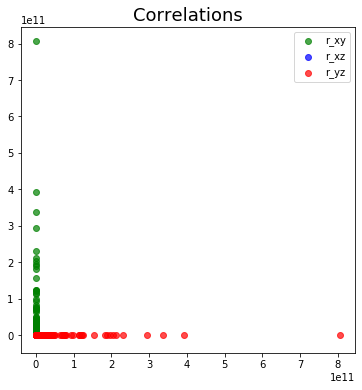

In [244]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Travelservicesofserviceex, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.Travelservicesofserviceex, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

#### high_income

In [245]:
pg.partial_corr(data=df_without_empties, x='Travelservicesofcommercial', y='Commercialserviceexportscurr', covar='high_income', method = 'spearman')

,n,r,CI95%,p-val
spearman,161,-0.24641,"[-0.39, -0.09]",0.001684


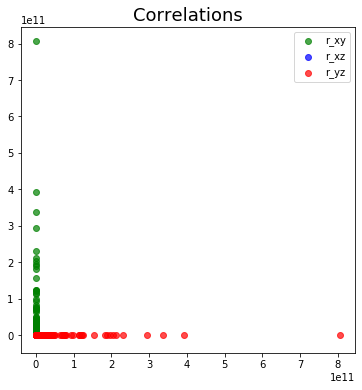

In [246]:
plt.figure(figsize=(6, 6))

plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.Commercialserviceexportscurr, c='g', alpha=0.7, label='r_xy')
plt.scatter(df_without_empties.Travelservicesofcommercial, df_without_empties.high_income, c='b', alpha=0.7, label='r_xz')
plt.scatter(df_without_empties.Commercialserviceexportscurr, df_without_empties.high_income, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

The correlation now in not statistically significant and the correlation itself became weaker. Seems that high_income can explain the correlation between 'Travelservicesofcommercial' and 'Commercialserviceexportscurr'

In [247]:
stats.spearmanr(df_without_empties.dropna(subset=['high_income']).Commercialserviceexportscurr, df_without_empties.dropna(subset=['high_income']).high_income)

SpearmanrResult(correlation=0.5200538367628067, pvalue=1.5491959477615879e-12)

Indeed, there is a medium correlation between Commercialserviceexportscurr and high_income.

### Conclusion:

The correlation between Travelservicesofcommercial and Commercialserviceexportscurr can be explained by the following variables:
- ArmsexportsSIPRItrendindica
- ExportsofgoodsandservicesB
- Exportsofgoodsandservicesc
- GoodsexportsBoPcurrentUS
- Hightechnologyexportscurrent
- TaxesonexportscurrentLCU
- high_income

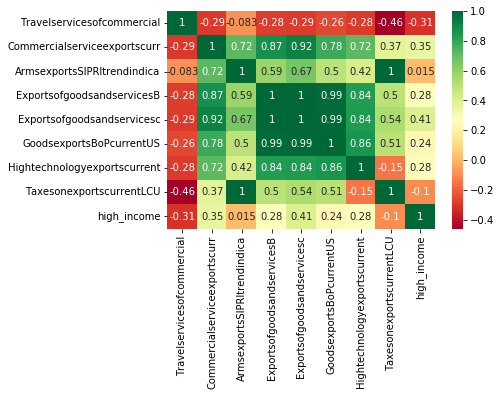

In [248]:
sns.heatmap(df[['Travelservicesofcommercial','Commercialserviceexportscurr','ArmsexportsSIPRItrendindica', 'ExportsofgoodsandservicesB','Exportsofgoodsandservicesc','GoodsexportsBoPcurrentUS','Hightechnologyexportscurrent','TaxesonexportscurrentLCU','high_income']].corr(), annot=True, cmap='RdYlGn')